In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
#pip install numpy==1.22.9
#date_time = pd.to_datetime(df.pop('Timestamp'), format='%Y.%m.%d %H:%M:%S')


In [ ]:
df1 = pd.read_csv('power.csv')
# Slice [start:stop:step], starting from index 5 take every 6th record.
#df = df[5::6]
df1.head()


,Timestamp,Power(kW)
0,2019-01-01 00:00:00,705.876648
1,2019-01-01 00:10:00,884.711670
2,2019-01-01 00:20:00,982.875000
3,2019-01-01 00:30:00,1115.943359
4,2019-01-01 00:40:00,1263.841675


In [ ]:
df=df1[:1000]
dfts=df1[1000:1100]
len(df)

1000

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Power(kW),136730.0,1138.55635,1078.419992,-48.596668,80.394167,778.220825,2310.443237,2779.42334


In [ ]:
df.set_index('Timestamp', inplace=True)
dfts.set_index('Timestamp', inplace=True)

In [ ]:
df.head()

,Power(kW)
Timestamp,
2019-01-01 00:00:00,705.876648
2019-01-01 00:10:00,884.711670
2019-01-01 00:20:00,982.875000
2019-01-01 00:30:00,1115.943359
2019-01-01 00:40:00,1263.841675


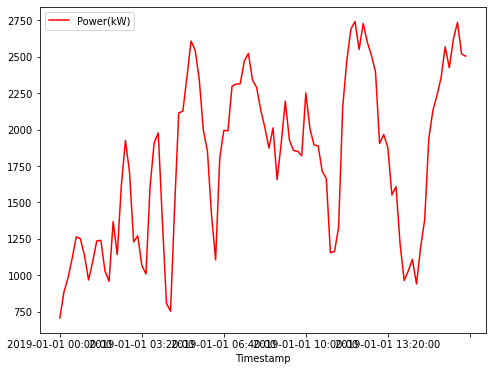

In [ ]:
df[:100].plot(color='red')

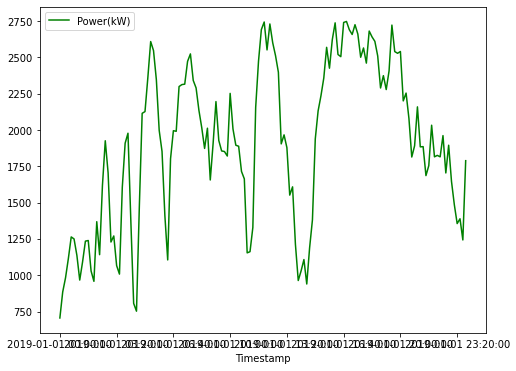

In [ ]:
df_2019day1 = df[(df.index>'2019-01-01') & (df.index<'2019-01-02')]

df_2019day1.plot(color='green')

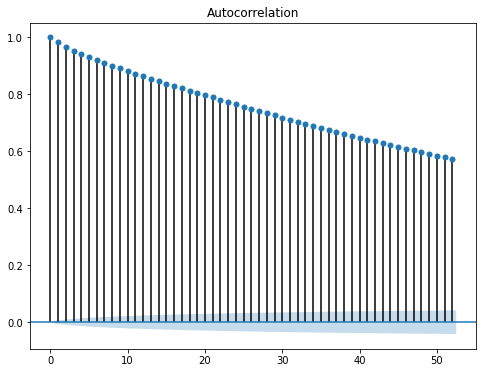

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df);

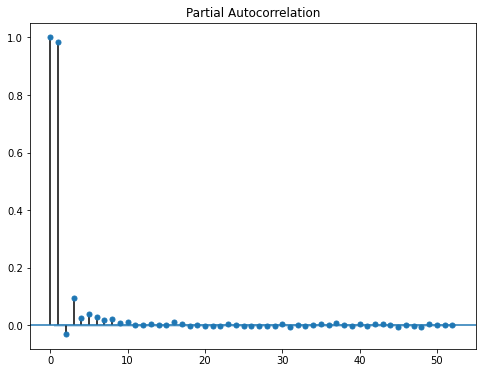

In [ ]:
plot_pacf(df);


In [ ]:
import numpy as np
def sampling(sequence, n_steps):

  X, Y=list(), list()

  for i in range(len(sequence)):
    sam = i+n_steps
    if sam >len(sequence)-1:
      break
  
    x,y = sequence[i:sam],sequence[sam]
    X.append(x)
    Y.append(y)

  return np.array(X),np.array(Y)


In [ ]:
n_steps=10

X,Y=sampling(df['Power(kW)'].tolist(), n_steps)

In [ ]:
len(df)

136730

In [ ]:
for i in range(len(X)):
  print(X[i],Y[i])

Streaming output truncated to the last 5000 lines.
[2717.98339844 2670.18505859 2746.9765625  2562.94995117 2688.38330078
 2643.33666992 2669.23168945 2630.2565918  2729.16992188 2653.8984375 ] 2717.655029296875
[2670.18505859 2746.9765625  2562.94995117 2688.38330078 2643.33666992
 2669.23168945 2630.2565918  2729.16992188 2653.8984375  2717.6550293 ] 2718.13330078125
[2746.9765625  2562.94995117 2688.38330078 2643.33666992 2669.23168945
 2630.2565918  2729.16992188 2653.8984375  2717.6550293  2718.13330078] 2739.25830078125
[2562.94995117 2688.38330078 2643.33666992 2669.23168945 2630.2565918
 2729.16992188 2653.8984375  2717.6550293  2718.13330078 2739.25830078] 2743.888427734375
[2688.38330078 2643.33666992 2669.23168945 2630.2565918  2729.16992188
 2653.8984375  2717.6550293  2718.13330078 2739.25830078 2743.88842773] 2747.32177734375
[2643.33666992 2669.23168945 2630.2565918  2729.16992188 2653.8984375
 2717.6550293  2718.13330078 2739.25830078 2743.88842773 2747.32177734] 2711.0

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
n_features=1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
X= X.reshape((X.shape[0], X.shape[1],1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,Y,epochs=200, verbose=0)

In [ ]:
x_test = np.array(dfts['Power(kW)'][:10].tolist())
x_test=x_test.reshape((1,n_steps,1))

In [ ]:
ypred = model.predict(x_test, verbose=0)
print(ypred,dfts['Power(kW)'][10])

[[2659.364]] 2711.873291015625
